## SuperMarket Marketing Campaign

## Problem Statement

### Business Context

'All NeedS' Supermarket is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only \$499 which is \$999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The upper management are a firm believer in the power of data and feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer. The predictive model will be built using the data gathered during last year's campaign.

### Objective
The supermarket wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. As a data scientist at this supermarket, you need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response. Also, in order to ensure the model achieves the best performance, the model performance has to be improved using hyperparameter tuning and by preventing data leakage. Finally, pipelines have to be used to make the model production ready.

### Data Description

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase


In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [2]:
db = pd.read_excel('marketing_data.xlsx')

In [3]:
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,2014-11-05 00:00:00,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,2014-08-04 00:00:00,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [4]:
db.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.000,0,1,2013-07-03 00:00:00,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.000,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.000,1,0,2012-03-12 00:00:00,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.000,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.000,0,2,2012-01-09 00:00:00,99,169,24,553,188,0,144,1,8,5,4,7,1,0


In [5]:
db.shape

(2240, 22)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
db.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Dt_Customer,2240,663,8/31/12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


In [8]:
db.duplicated().sum()

0

In [9]:
db.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [10]:
round(db.isnull().sum() / db.isnull().count() * 100,2)

ID                    0.000
Year_Birth            0.000
Education             0.000
Marital_Status        0.000
Income                1.070
Kidhome               0.000
Teenhome              0.000
Dt_Customer           0.000
Recency               0.000
MntWines              0.000
MntFruits             0.000
MntMeatProducts       0.000
MntFishProducts       0.000
MntSweetProducts      0.000
MntGoldProds          0.000
NumDealsPurchases     0.000
NumWebPurchases       0.000
NumCatalogPurchases   0.000
NumStorePurchases     0.000
NumWebVisitsMonth     0.000
Response              0.000
Complain              0.000
dtype: float64

## Feature Engineering

In [11]:
data = db.copy()

In [12]:
# We will have to drop ID because it doesn't add any value to the project
data.drop(columns=["ID"], inplace=True)

In [13]:
# We need to calculate age by subtracting 2016 from initial date.
data["Age"] = 2016 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(
    lambda x: x.year
)

data["Age"].sort_values()

562      20
1824     20
697      21
1468     21
964      21
1298     21
1467     21
259      22
1263     22
687      22
1495     23
1494     23
1339     23
1518     23
293      23
1434     24
1602     24
173      24
1603     24
932      24
2132     24
1043     24
304      24
239      24
1393     24
912      24
318      24
1544     24
639      25
851      25
1075     25
1416     25
672      25
2075     25
1176     25
671      25
744      25
403      25
924      25
1280     25
2150     25
1279     25
427      25
1737     26
362      26
363      26
2125     26
364      26
1410     26
655      26
445      26
108      26
1598     26
444      26
1942     26
1583     26
2203     26
1368     26
165      26
34       26
190      26
1735     27
332      27
603      27
331      27
1572     27
963      27
1754     27
641      27
1732     27
1175     27
1098     27
1165     27
782      27
1558     27
1867     27
1285     27
1286     27
2213     27
781      27
141      27
136      27
1736     27
2047

In [14]:
data[data['Age']> 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.000,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,123
827,1899,PhD,Together,83532.000,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,117
2233,1900,2n Cycle,Divorced,36640.000,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,1,116


In [15]:
data.drop(data[data['Age'] > 100]. index, inplace = True) 

In [16]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.000,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,1,0,46
1,1961,Graduation,Single,57091.000,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,1,0,55
2,1958,Graduation,Married,67267.000,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,58
3,1967,Graduation,Together,32474.000,1,1,2014-11-05 00:00:00,0,10,0,1,0,0,0,1,1,0,2,7,0,0,49
4,1989,Graduation,Single,21474.000,1,0,2014-08-04 00:00:00,0,6,16,24,11,0,34,2,3,1,2,7,1,0,27


**Using Dt_Customer to add features to the data**

In [17]:
# We have to convert this to date time format 
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

In [18]:
# We will extract registration year from the date
data["Reg_year"] = data["Dt_Customer"].apply(lambda x: x.year)

# We will extract registration quarter from the date
data["Reg_quarter"] = data["Dt_Customer"].apply(lambda x: x.quarter)

# We will do same extraction in registration month from the date
data["Reg_month"] = data["Dt_Customer"].apply(lambda x: x.month)

# Extract registration week from the date
data["Reg_week"] = data["Dt_Customer"].apply(lambda x: x.day // 7)

In [19]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week
0,1970,Graduation,Divorced,84835.000,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,46,2014,2,6,2
1,1961,Graduation,Single,57091.000,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,55,2014,2,6,2
2,1958,Graduation,Married,67267.000,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,58,2014,2,5,1
3,1967,Graduation,Together,32474.000,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,49,2014,4,11,0
4,1989,Graduation,Single,21474.000,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,27,2014,3,8,0


In [20]:
# Let make a list of all categorical variables in the dataset
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",
    "Reg_year",
    "Reg_quarter",
    "Reg_month",
    "Reg_week",
]

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
0    1291
1     898
2      48
Name: Kidhome, dtype: int64
----------------------------------------
0    1156
1    1029
2      52
Name: Teenhome, dtype: int64
----------------------------------------
0    2217
1      20
Name: Complain, dtype: int64
----------------------------------------
0    1903
1     334
Name: Response, dtype: int64
----------------------------------------
2013    1187
2014     556
2012     494
Name: Reg_year, dtype: int64
----------------------------------------
4    596
1    580
2    545
3    516
Name: Reg_quarter, dtype: int64
----------------------------------------
8     211
10    209
3     202
12 

In [21]:
# Lets replace 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [22]:
# Lets replace YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(
    ["YOLO", "Alone", "Absurd"], "Single"
)
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

**Lets create a new column - total amount spent by each customer in the last 2 year

In [23]:
data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

In [24]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
0,1970,Graduation,Divorced,84835.000,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,46,2014,2,6,2,1190
1,1961,Graduation,Single,57091.000,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,55,2014,2,6,2,577
2,1958,Graduation,Married,67267.000,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,58,2014,2,5,1,251
3,1967,Graduation,Married,32474.000,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,49,2014,4,11,0,11
4,1989,Graduation,Single,21474.000,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,27,2014,3,8,0,91


### Exploratory Data Analysis

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Univariate Analysis

#### Education

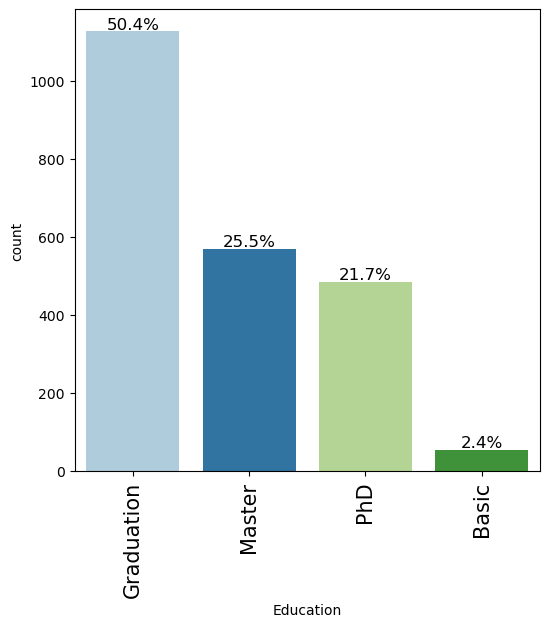

In [28]:
labeled_barplot(data, 'Education',perc = True)

#### Income

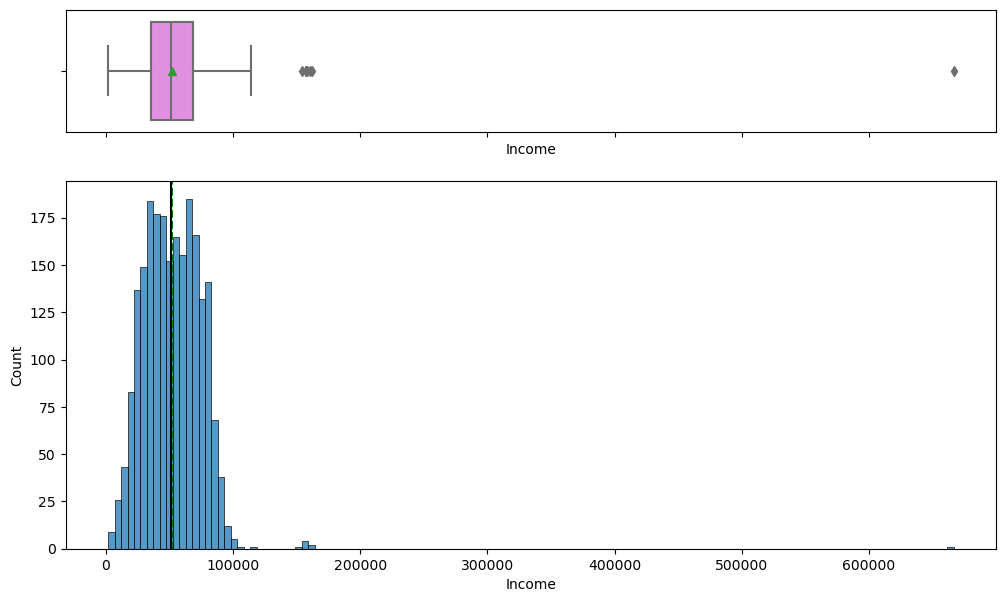

In [29]:
histogram_boxplot(data, 'Income')

In [30]:
data[data["Income"] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
527,1977,Graduation,Married,666666.000,1,0,2013-02-06,23,9,14,18,8,1,12,4,3,1,3,6,0,0,39,2013,1,2,0,62


In [31]:
# Dropping observaion with income greater than 20000. Since there is just 1 such observation
data.drop(index=data[data.Income > 200000].index, inplace=True)

#### Marital status

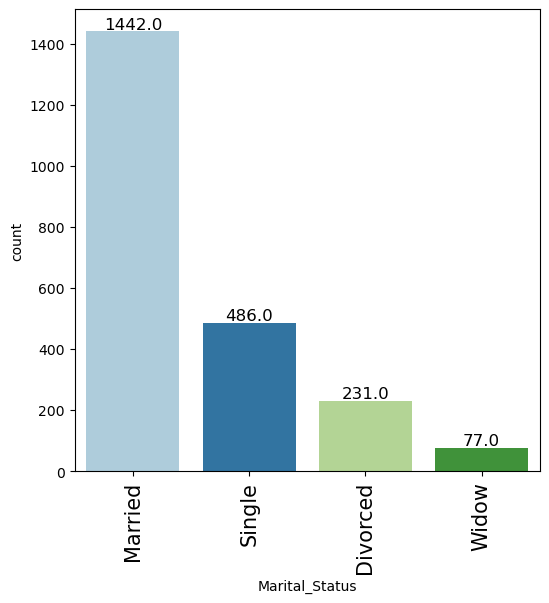

In [32]:
labeled_barplot(data, 'Marital_Status')

#### Kidhome

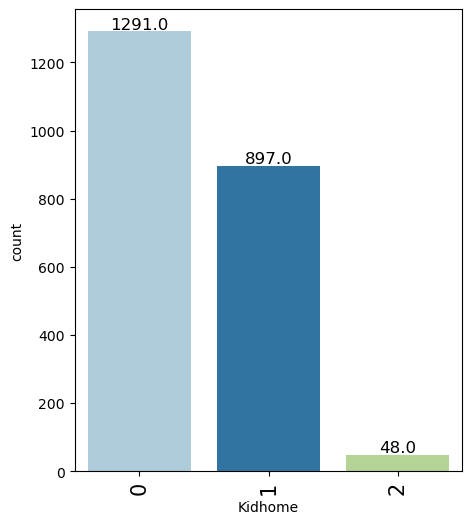

In [33]:
labeled_barplot(data, 'Kidhome')

#### Teenhome

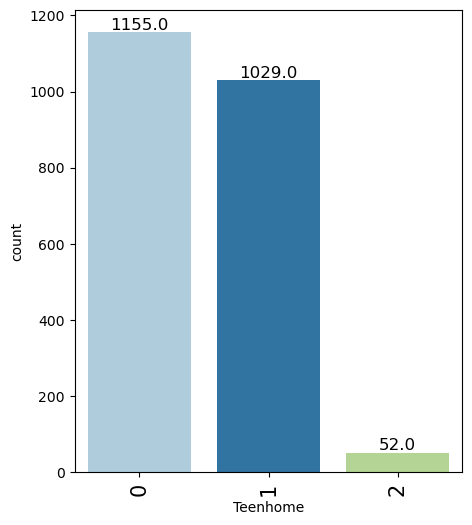

In [34]:
labeled_barplot(data, 'Teenhome')

#### MntWines

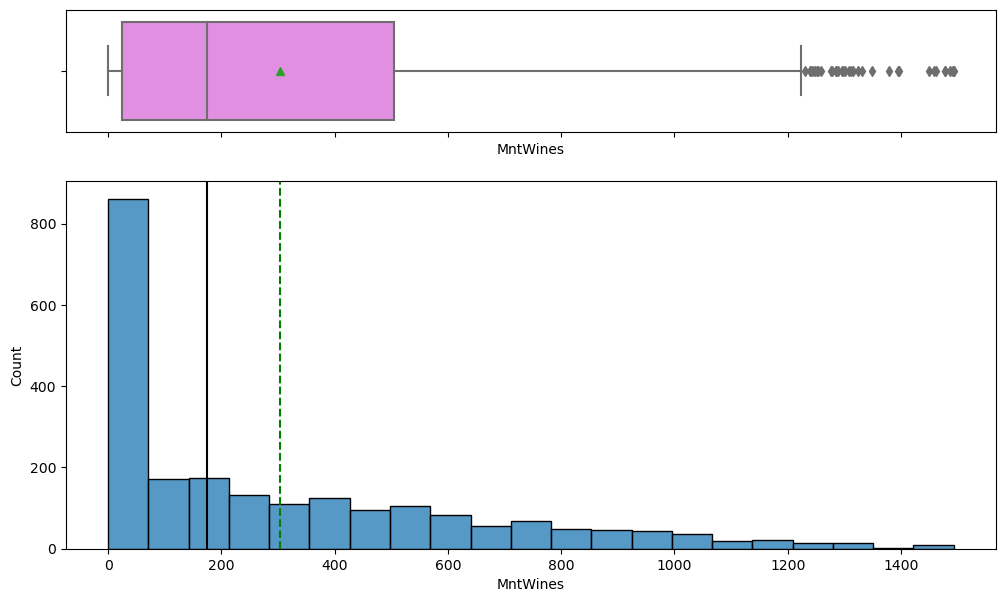

In [35]:
histogram_boxplot(data, 'MntWines')

#### MntFruits

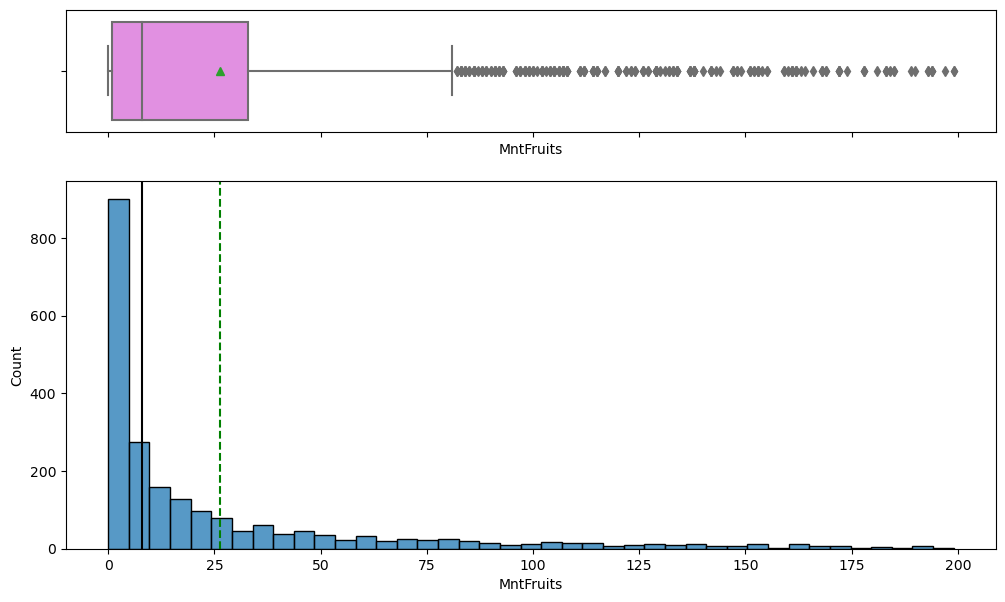

In [36]:
histogram_boxplot(data, 'MntFruits')

#### MntSweetProducts

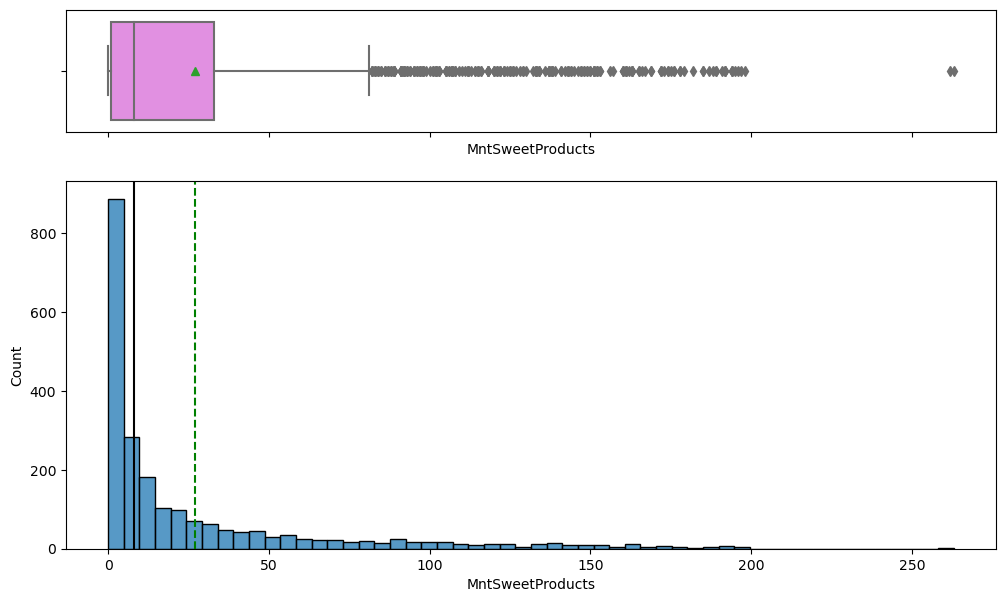

In [37]:
# observations on MntSweetProducts
histogram_boxplot(data, "MntSweetProducts")

In [38]:
data[data["MntSweetProducts"] > 200]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
210,1945,PhD,Single,113734.000,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,71,2014,2,5,4,277
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,30,2013,1,2,2,637


In [39]:
# Capping values for amount spent on sweet products at 198
data["MntSweetProducts"].clip(upper=198, inplace=True)

#### MntMeatProducts

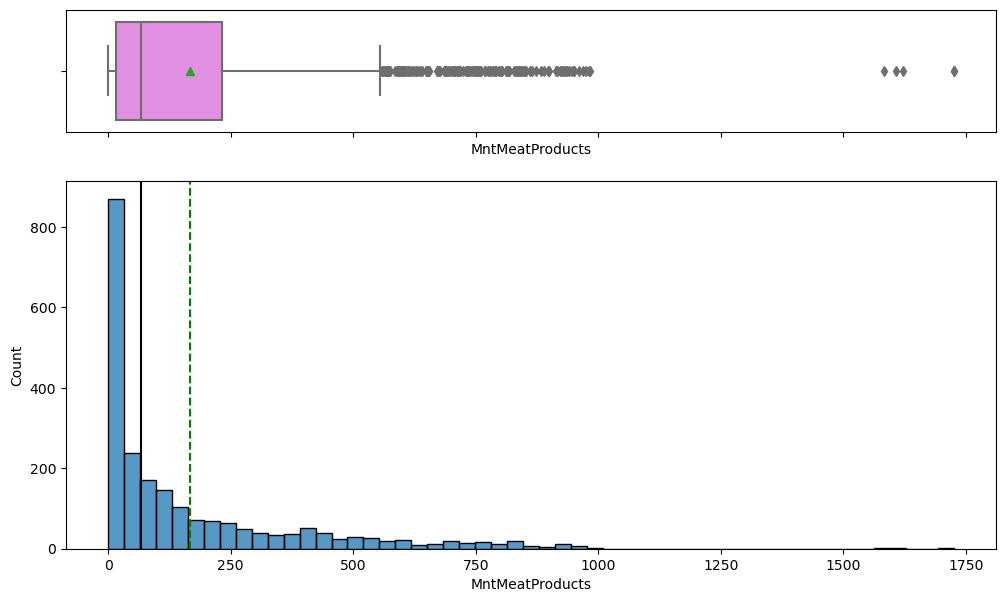

In [40]:
histogram_boxplot(data, 'MntMeatProducts')

In [41]:
# Checking 10 largest values of amount spend on meat products
data.MntMeatProducts.nlargest(10)

325     1725
961     1725
497     1622
1213    1607
2204    1582
1921     984
53       981
994      974
2021     968
1338     961
Name: MntMeatProducts, dtype: int64

In [42]:
data[data["MntMeatProducts"] > 1580]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
325,1977,Graduation,Married,157146.000,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,39,2013,2,4,4,1730
497,1982,PhD,Married,160803.000,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,34,2012,2,4,1,1717
961,1979,Graduation,Married,2447.000,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,37,2013,2,6,0,1730
1213,1978,Master,Married,NaN,0,0,2012-12-08,53,32,2,1607,12,4,22,0,0,0,1,0,0,0,38,2012,4,12,1,1679
2204,1973,PhD,Married,157243.000,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,43,2014,1,1,0,1608


In [43]:
# Capping values for amount spent on meat products at next highest value i.e. 984
data["MntMeatProducts"].clip(upper=984, inplace=True)

#### MntFishProducts

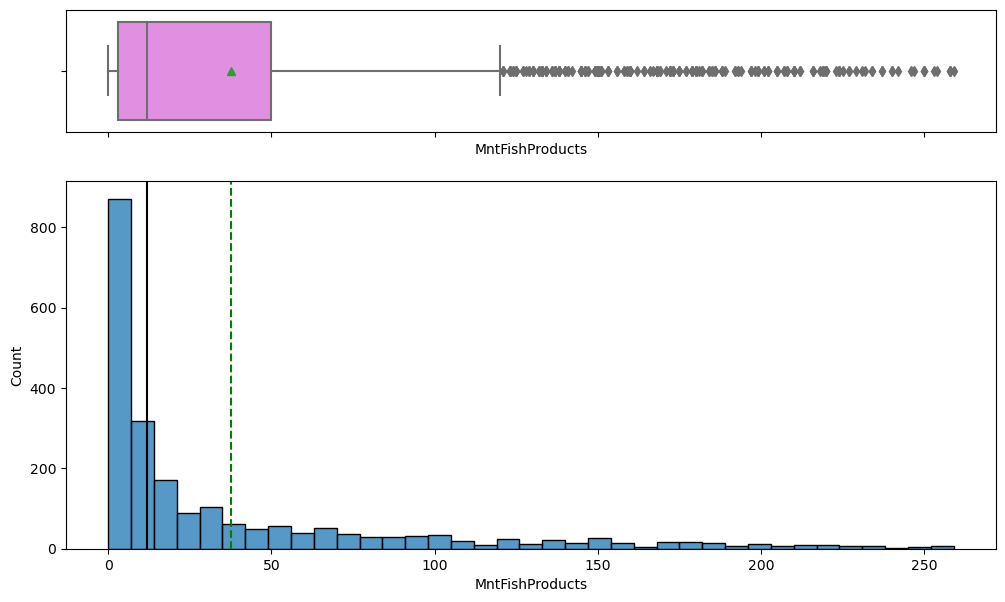

In [44]:
histogram_boxplot(data, 'MntFishProducts')

`#### NumWebPurchases`

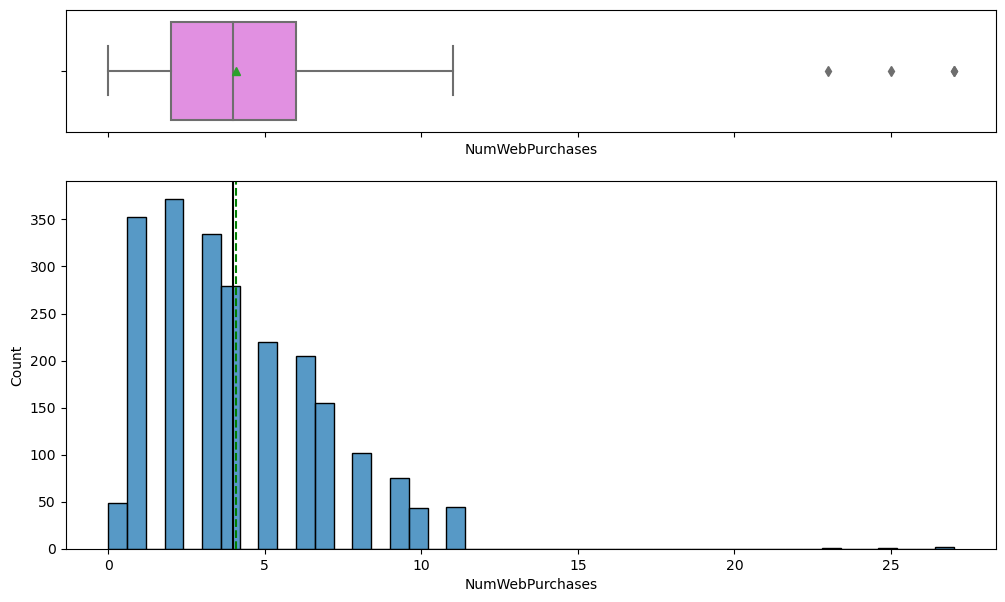

In [45]:
# observations on NumWebPurchases
histogram_boxplot(data, "NumWebPurchases")

In [46]:
data[data["NumWebPurchases"] > 15]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
14,1969,Graduation,Married,4428.000,0,1,2013-05-10,0,16,4,12,2,4,321,0,25,0,0,1,0,0,47,2013,2,5,1,359
210,1945,PhD,Single,113734.000,0,0,2014-05-28,9,6,2,3,1,198,3,0,27,0,0,1,0,0,71,2014,2,5,4,277
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,198,362,0,27,0,0,1,0,0,30,2013,1,2,2,637
2063,1966,PhD,Single,7144.000,0,2,2013-07-12,92,81,4,33,5,2,291,0,23,1,1,0,0,0,50,2013,3,7,1,416


In [47]:
# Capping values for number of web purchases at 11
data["NumWebPurchases"].clip(upper=11, inplace=True)

#### Registered Year

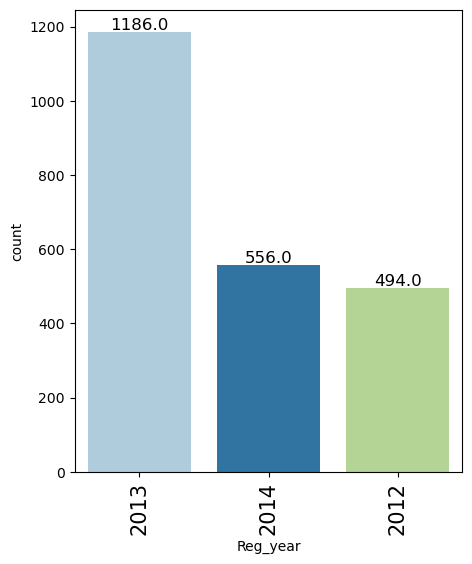

In [48]:
labeled_barplot(data, 'Reg_year')

#### Registered Quarter

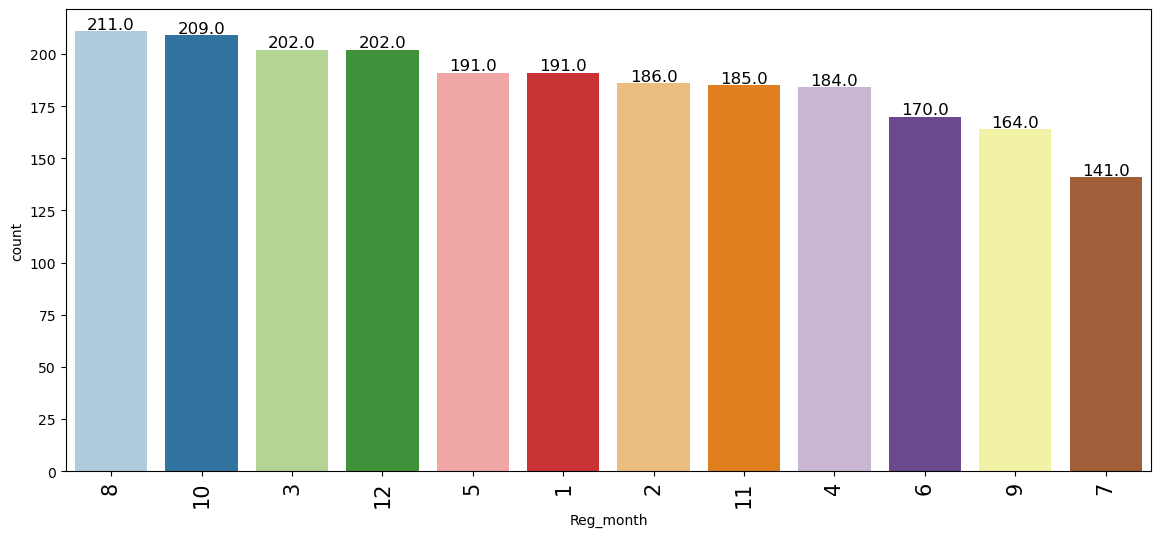

In [49]:
labeled_barplot(data, 'Reg_month')

#### Registered Week

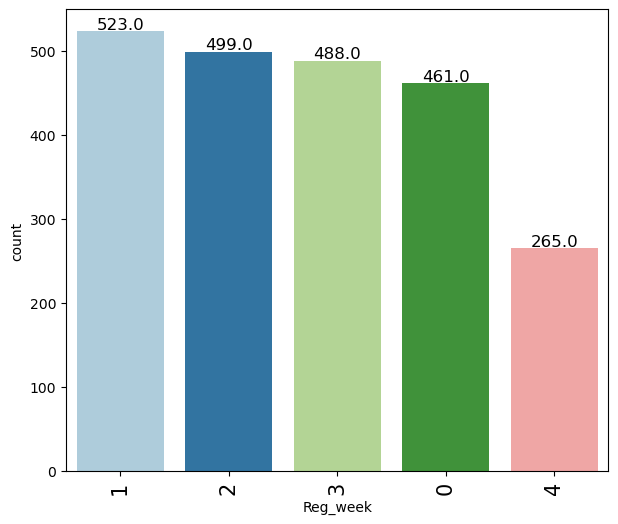

In [50]:
labeled_barplot(data,'Reg_week')

### Response

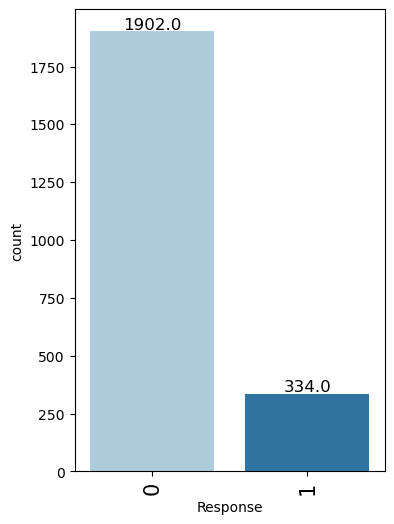

In [51]:
labeled_barplot(data, 'Response')

#### MntGoldProds

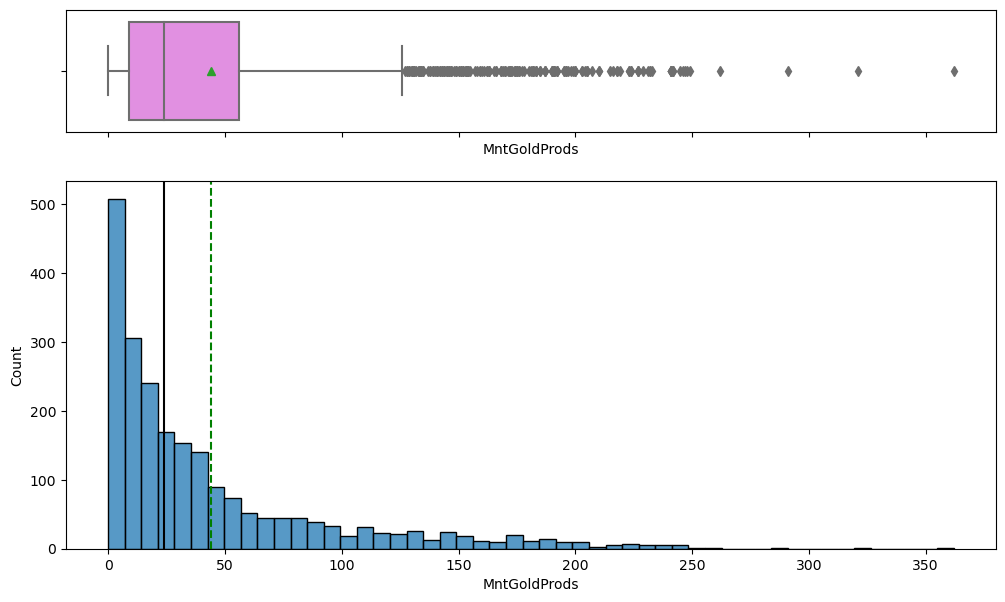

In [52]:
# observations on MntGoldProds
histogram_boxplot(data, "MntGoldProds")

In [53]:
data[data["MntGoldProds"] > 250]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Reg_year,Reg_quarter,Reg_month,Reg_week,Total_Amount_Spent
14,1969,Graduation,Married,4428.000,0,1,2013-05-10,0,16,4,12,2,4,321,0,11,0,0,1,0,0,47,2013,2,5,1,359
60,1982,Master,Single,6560.000,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,34,2013,4,12,1,373
449,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,198,362,0,11,0,0,1,0,0,30,2013,1,2,2,637
2063,1966,PhD,Single,7144.000,0,2,2013-07-12,92,81,4,33,5,2,291,0,11,1,1,0,0,0,50,2013,3,7,1,416


#### Bivariate Analysis

`MntWines,MntGoldProds,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts`

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

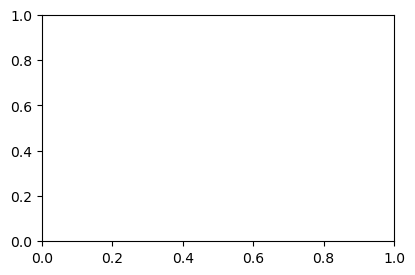

In [54]:
cols = data[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"],data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

`Reg_year & Reg_month vs Total_Amount_Spent `

In [ ]:
pd.pivot_table(
    data=data,
    index=["Reg_year", "Reg_month"],
    values="Total_Amount_Spent",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2, figsize=(12, 5))

`Total_Amount_Spent vs Income

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=data.Total_Amount_Spent, x=data.Income)

## Data Preprocessing

**Note**: We will be imputing the missing values in the data after splitting into train, validation, and test sets to avoid data leakage.

### Data Preparation for Modeling

In [ ]:
dataB = data.copy()

In [ ]:
# Dropping birth year and Dt_Customer columns
dataB.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "Reg_quarter",
        "Total_Amount_Spent",
    ],
    inplace=True,
)

In [ ]:
# Separating target variable and other variables
X = dataB.drop(columns="Response")
X = pd.get_dummies(X)

Y = dataB["Response"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

### Missing-Value Treatment

In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

## Model Building

### Model evaluation criterion:

**Model can make wrong predictions as**:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

**Which case is more important?**
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

**How to reduce this loss i.e need to reduce False Negatives?**
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)

First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Initial Models

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

### Model Building with original data

In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))## Complete the code to append remaining 5 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)## Complete the code to build models on oversampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))## Complete the code to append remaining 5 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model,X=X_train, y=y_train, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)## Complete the code to build models on undersampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## HyperparameterTuning 

**We will tune Adaboost,XGBoost, dtree, and GBM models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by the two hyperparameter tuning methods - grid search and randomized search.**

### Using RandomsearchCV to tune the models

### Decision Tree

#### Tuning with Decision tree using oversampled data

In [ ]:
# defining model
DT = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=DT, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
DT = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=7, 
    max_leaf_nodes=15,
    min_impurity_decrease=0.0001,
)
# Fit the model on training data
DT.fit(X_train_over, y_train_over)

In [ ]:
Dtree_train_perf = model_performance_classification_sklearn(DT, X_train_over, y_train_over)
print("Training performance:")
Dtree_train_perf

In [ ]:
# Calculating different metrics on validation set
Dtree_val_perf=  model_performance_classification_sklearn(DT, X_val, y_val)
print("Validation performance:")
Dtree_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(DT, X_val, y_val)

#### Tuning with Decision tree using undersampled data

In [ ]:
# defining model
DTU = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=DTU, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
DTU = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=1, 
    max_leaf_nodes=10,
    min_impurity_decrease=0.001,
)
# Fit the model on training data
DTU.fit(X_train_un, y_train_un)

In [ ]:
Dtree_train_perf1 = model_performance_classification_sklearn(DTU, X_train_un, y_train_un)
print("Training performance:")
Dtree_train_perf1

In [ ]:
# Calculating different metrics on validation set
Dtree_val_perf1 =  model_performance_classification_sklearn(DTU, X_val, y_val)
print("Validation performance:")
Dtree_val_perf1

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(DTU, X_val, y_val)

#### Tuning XGBoost with oversampling data

In [ ]:
%%time 

# defining model
XGB = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[50,100,150],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
XGB = XGBClassifier(
    gamma=0,
    scale_pos_weight=10,
    learning_rate=0.1,
    n_estimators=50,
    subsample=0.8,
)## Complete the code with the best parameters obtained from tuning

XGB.fit(X_train_over, y_train_over)

In [ ]:
XGB_train_perf =  model_performance_classification_sklearn(XGB, X_train_over, y_train_over)
print("Training performance:") 
XGB_train_perf

In [ ]:
XGB_val_perf =  model_performance_classification_sklearn(XGB, X_val, y_val)
print("Validation performance:")
XGB_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGB, X_val, y_val)

#### Let change the parameters and tune it again using oversampled data

In [ ]:
%%time 

# defining model
Tuned_XGB= XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[100,200,300],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Tuned_XGB, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
Tuned_XGB = XGBClassifier(
    gamma=5,
    scale_pos_weight=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

Tuned_XGB.fit(X_train_over, y_train_over)

In [ ]:
XGB_train_perf1 =  model_performance_classification_sklearn(Tuned_XGB, X_train_over, y_train_over)
print("Training performance:") 
XGB_train_perf1

In [ ]:
XGB_val_perf1 =  model_performance_classification_sklearn(Tuned_XGB, X_val, y_val)
print("Validation performance:")
XGB_val_perf1

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(Tuned_XGB, X_val, y_val)

#### Tuning XGBoost with undersampling data

In [ ]:
%%time 

# defining model
XGB2= XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[50,100,150],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB2, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
XGB2 = XGBClassifier(
    gamma=5,
    scale_pos_weight=10,
    learning_rate=0.1,
    n_estimators=150,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

XGB2.fit(X_train_un, y_train_un)

In [ ]:
XGB_train_perf2 =  model_performance_classification_sklearn(XGB2, X_train_un, y_train_un)
print("Training performance:") 
XGB_train_perf2

In [ ]:
XGB_val_perf2 =  model_performance_classification_sklearn(XGB2, X_val, y_val)
print("Validation performance:")
XGB_val_perf2

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGB2, X_val, y_val)

#### Let change the parameters and tune it again using undersampled data

In [ ]:
%%time 

# defining model
XGB3= XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[100,200,300],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB3, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
XGB3 = XGBClassifier(
    gamma=5,
    scale_pos_weight=10,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

XGB3.fit(X_train_un, y_train_un)

In [ ]:
XGB_train_perf3 =  model_performance_classification_sklearn(XGB3, X_train_un, y_train_un)
print("Training performance:") 
XGB_train_perf3

In [ ]:
XGB_val_perf3 =  model_performance_classification_sklearn(XGB3, X_val, y_val)
print("Validation performance:")
XGB_val_perf3

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGB3, X_val, y_val)

#### We want to tune it more and see the results we will get on undersampled data set

In [ ]:
%%time 

# defining model
XGB4= XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[200,800,1100],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB4, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
XGB4 = XGBClassifier(
    gamma=5,
    scale_pos_weight=10,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

XGB4.fit(X_train_un, y_train_un)

In [ ]:
XGB_train_perf4 =  model_performance_classification_sklearn(XGB4, X_train_un, y_train_un)
print("Training performance:") 
XGB_train_perf4

In [ ]:
XGB_val_perf4 =  model_performance_classification_sklearn(XGB4, X_val, y_val)
print("Validation performance:")
XGB_val_perf4

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGB4, X_val, y_val)

#### Tuned Adboost with oversampled data

In [ ]:
%%time 

# defining model
ADB= AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,150,200],
    "learning_rate":[0.2,0.05],
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ADB, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
ADB = XGBClassifier(
    learning_rate=0.2,
    max_depth=3,
    random_state=1,
    n_estimators=100,
)## Complete the code with the best parameters obtained from tuning

ADB.fit(X_train_over, y_train_over)

In [ ]:
ADB_train_perf =  model_performance_classification_sklearn(ADB, X_train_over, y_train_over)
print("Training performance:") 
ADB_train_perf

In [ ]:
ADB_val_perf =  model_performance_classification_sklearn(ADB, X_val, y_val)
print("Validation performance:")
ADB_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(ADB, X_val, y_val)

#### Let changed the parameters and Tuned Adboost with oversampled data

In [ ]:
%%time 

# defining model
ADB2= AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,1000,2200],
    "learning_rate":[0.2,0.05],
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ADB2, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
ADB2 = XGBClassifier(
    learning_rate=0.2,
    max_depth=1,
    random_state=1,
    n_estimators=1000,
)## Complete the code with the best parameters obtained from tuning

ADB2.fit(X_train_over, y_train_over)

In [ ]:
ADB2_train_perf =  model_performance_classification_sklearn(ADB2, X_train_over, y_train_over)
print("Training performance:") 
ADB2_train_perf

In [ ]:
ADB2_val_perf =  model_performance_classification_sklearn(ADB2, X_val, y_val)
print("Validation performance:")
ADB2_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(ADB2, X_val, y_val)

### Tuning AdaBoost with undersampling data 

In [ ]:
%%time 

# defining model
ADBU= AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,150,200],
    "learning_rate":[0.2,0.05],
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ADBU, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
ADBU = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    random_state=1,
    n_estimators=150,
)## Complete the code with the best parameters obtained from tuning

ADBU.fit(X_train_un, y_train_un)

In [ ]:
ADBU_train_perf =  model_performance_classification_sklearn(ADBU, X_train_un, y_train_un)
print("Training performance:") 
ADBU_train_perf

In [ ]:
ADBU_val_perf =  model_performance_classification_sklearn(ADBU, X_val, y_val)
print("Validation performance:")
ADBU_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(ADBU, X_val, y_val)

#### Let tune it further using undersampling data

In [ ]:
%%time 

# defining model
ADBU1= AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,300,2000],
    "learning_rate":[0.2,0.05],
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ADBU1, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
ADBU1 = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    random_state=1,
    n_estimators=200,
)## Complete the code with the best parameters obtained from tuning

ADBU1.fit(X_train_un, y_train_un)

In [ ]:
ADBU1_train_perf =  model_performance_classification_sklearn(ADBU1, X_train_un, y_train_un)
print("Training performance:") 
ADBU1_train_perf

In [ ]:
ADBU1_val_perf =  model_performance_classification_sklearn(ADBU1, X_val, y_val)
print("Validation performance:")
ADBU1_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(ADBU1, X_val, y_val)

#### Use different parameters still undersampling data

In [ ]:
%%time 

# defining model
ADBU2= AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [110,250,450],
    "learning_rate":[0.2,0.05],
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=ADBU2, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
ADBU2 = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    random_state=1,
    n_estimators=250,
)## Complete the code with the best parameters obtained from tuning

ADBU2.fit(X_train_un, y_train_un)

In [ ]:
ADBU2_train_perf =  model_performance_classification_sklearn(ADBU2, X_train_un, y_train_un)
print("Training performance:") 
ADBU2_train_perf

In [ ]:
ADBU2_val_perf =  model_performance_classification_sklearn(ADBU2, X_val, y_val)
print("Validation performance:")
ADBU2_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(ADBU2, X_val, y_val)

#### Tune Gradient Boosting with oversampling data

In [ ]:
%%time 

# defining model
GBM= GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[50,150,200],'learning_rate':[0.2, 0.05, 1],"subsample":[0.5,0.7],"max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GBM, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
GBM = GradientBoostingClassifier(
    max_features=0.7,
    subsample=0.7, 
    n_estimators=200,
    learning_rate=1,
)
# Fit the model on training data
GBM.fit(X_train_over, y_train_over)

In [ ]:
GBM_train_perf =  model_performance_classification_sklearn(GBM, X_train_over, y_train_over)
print("Training performance:") 
GBM_train_perf

In [ ]:
GBM_val_perf =  model_performance_classification_sklearn(GBM, X_val, y_val)
print("Validation performance:")
GBM_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM, X_val, y_val)

#### Let tune more on gradient boosting

In [ ]:
%%time 

# defining model
GBM1= GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[100,870,1657],'learning_rate':[0.2, 0.05, 1],"subsample":[0.5,0.7],"max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GBM1, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
GBM1 = GradientBoostingClassifier(
    max_features=0.7,
    subsample=0.7, 
    n_estimators=100,
    learning_rate=1,
)
# Fit the model on training data
GBM1.fit(X_train_over, y_train_over)

In [ ]:
GBM1_train_perf =  model_performance_classification_sklearn(GBM1, X_train_over, y_train_over)
print("Training performance:") 
GBM1_train_perf

In [ ]:
GBM1_val_perf =  model_performance_classification_sklearn(GBM1, X_val, y_val)
print("Validation performance:")
GBM1_val_perf

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM1, X_val, y_val)

#### Tuned Gradient Boosting with under sampling data

In [ ]:
%%time 

# defining model
GBM2= GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[100,870,1657],'learning_rate':[0.2, 0.05, 1],"subsample":[0.5,0.7],"max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GBM2, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
GBM2 = GradientBoostingClassifier(
    max_features=0.7,
    subsample=0.5, 
    n_estimators=100,
    learning_rate=0.05,
)
# Fit the model on training data
GBM2.fit(X_train_un, y_train_un)

In [ ]:
GBM2_train_perf =  model_performance_classification_sklearn(GBM2, X_train_un, y_train_un)
print("Training performance:") 
GBM2_train_perf

In [ ]:
GBM2_val_perf =  model_performance_classification_sklearn(GBM2, X_val, y_val)
print("Validation performance:")
GBM2_val_perf

#### Tune more Gradient Boosting undersampling

In [ ]:
%%time 

# defining model
GBM3= GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[19,375,2179],'learning_rate':[0.2, 0.05, 1],"subsample":[0.5,0.7],"max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GBM3, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
GBM3 = GradientBoostingClassifier(
    max_features=0.7,
    subsample=0.7, 
    n_estimators=19,
    learning_rate=0.05,
)
# Fit the model on training data
GBM3.fit(X_train_un, y_train_un)

In [ ]:
GBM3_train_perf =  model_performance_classification_sklearn(GBM3, X_train_un, y_train_un)
print("Training performance:") 
GBM3_train_perf

In [ ]:
GBM3_val_perf =  model_performance_classification_sklearn(GBM3, X_val, y_val)
print("Validation performance:")
GBM3_val_perf

### Random Forest with oversampled data

In [ ]:
%%time 

# defining model
RF= RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={ "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
RF = RandomForestClassifier(
    max_samples=0.4,
    min_samples_leaf=1, 
    n_estimators=200,
    max_features='sqrt',
)
# Fit the model on training data
RF.fit(X_train_over, y_train_over)

In [ ]:
RF_train_perf =  model_performance_classification_sklearn(RF, X_train_over, y_train_over)
print("Training performance:") 
RF_train_perf

In [ ]:
RF_val_perf =  model_performance_classification_sklearn(RF, X_val, y_val)
print("Validation performance:")
RF_val_perf

#### Bagging with undersampled data

In [ ]:
%%time 

# defining model
BAGU= BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[350,800,1500],"max_features":[0.7,0.8,0.9], 'max_samples':[0.8,0.9,1]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=BAGU, param_distributions=param_grid, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)
 ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# building model with best parameters
BAGU = BaggingClassifier(
    max_features=0.7,
    max_samples=1, 
    n_estimators=350,
)
# Fit the model on training data
BAGU.fit(X_train_un, y_train_un)

In [ ]:
BAGU_train_perf =  model_performance_classification_sklearn(BAGU, X_train_un, y_train_un)
print("Training performance:") 
BAGU_train_perf

In [ ]:
BAGU_val_perf =  model_performance_classification_sklearn(BAGU, X_val, y_val)
print("Validation performance:")
BAGU_val_perf

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Dtree_train_perf.T,
        Dtree_train_perf1.T,
        XGB_train_perf.T,
        XGB_train_perf1.T,
        XGB_train_perf2.T,
        XGB_train_perf3.T,
        XGB_train_perf4.T,
        ADB_train_perf.T, 
        ADB2_train_perf.T, 
        ADBU_train_perf.T,
        ADBU1_train_perf.T,
        ADBU2_train_perf.T,
        GBM_train_perf.T,
        GBM1_train_perf.T,
        GBM2_train_perf.T,
        GBM3_train_perf.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data 1",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data 2",
    "Gradient Boosting tuned with undersampled data 3",
    "AdaBoost tuned with oversampled data 2",
    "AdaBoost tuned with oversampled data",
    "AdaBoost tuned with undersampled data ",
    "AdaBoost tuned with undersampled data 1",
    "AdaBoost tuned with undersampled data 2",
    "XGBoost tuned with oversampled data_tuned",
    "XGBoost tuned with oversampled data ",
    "XGBoost tuned with undersampled data 4",
    "XGBoost tuned with undersampled data2",
    "XGBoost tuned with undersampled data3",
    "Decision Tree tuned with undersampled data",
    "Decision Tree tuned with oversampled data",
    
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison
models_val_comp_df = pd.concat(
    [
        Dtree_val_perf.T,
        Dtree_val_perf1.T,
        XGB_val_perf.T,
        XGB_val_perf1.T,
        XGB_val_perf2.T,
        XGB_val_perf3.T,
        XGB_val_perf4.T,
        ADB_val_perf.T, 
        ADB2_val_perf.T, 
        ADBU_val_perf.T,
        ADBU1_val_perf.T,
        ADBU2_val_perf.T,
        GBM_val_perf.T,
        GBM1_val_perf.T,
        GBM2_val_perf.T,
        GBM3_val_perf.T,
         
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data 1",
    "Gradient Boosting tuned with oversampled data",
    "Gradient Boosting tuned with undersampled data 2",
    "Gradient Boosting tuned with undersampled data 3",
    "AdaBoost tuned with oversampled data 2",
    "AdaBoost tuned with oversampled data",
    "AdaBoost tuned with undersampled data ",
    "AdaBoost tuned with undersampled data 1",
    "AdaBoost tuned with undersampled data 2",
    "XGBoost tuned with oversampled data_tuned",
    "XGBoost tuned with oversampled data ",
    "XGBoost tuned with undersampled data 4",
    "XGBoost tuned with undersampled data2",
    "XGBoost tuned with undersampled data3",
    "Decision Tree tuned with undersampled data",
    "Decision Tree tuned with oversampled data",
       
]
print("Validation performance comparison:")
models_val_comp_df